In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#load and print the dataset
df = pd.read_csv('/content/insurance.csv')

In [5]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape


(1338, 7)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
#check for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

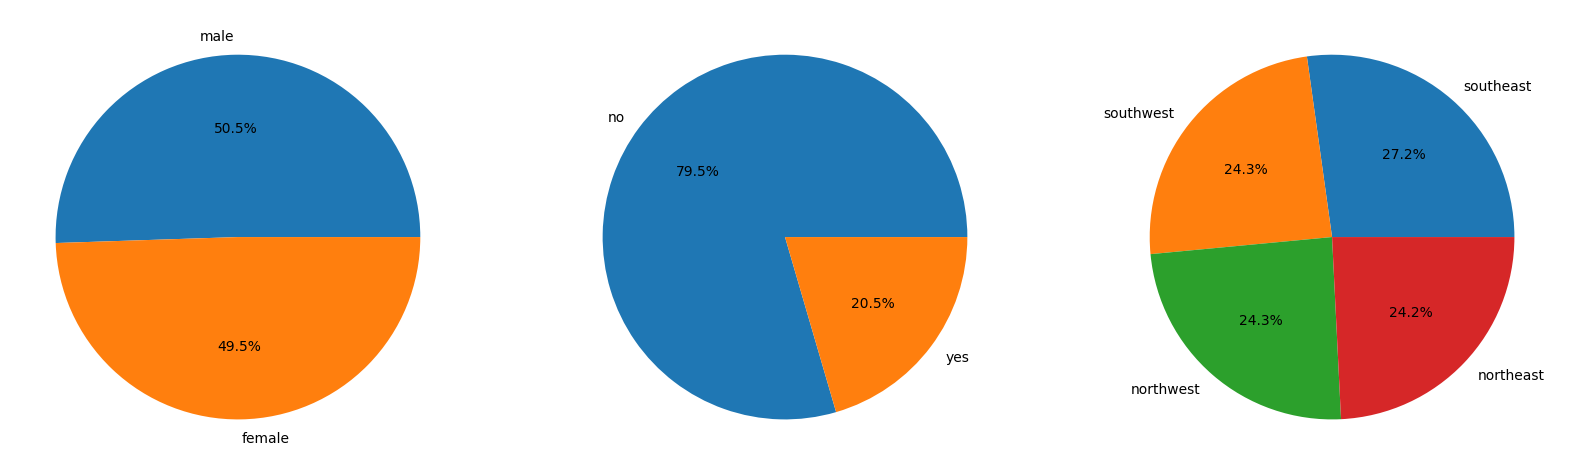

In [10]:
#pie charts
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values, labels=x.index, autopct='%1.1f%%')

plt.show()


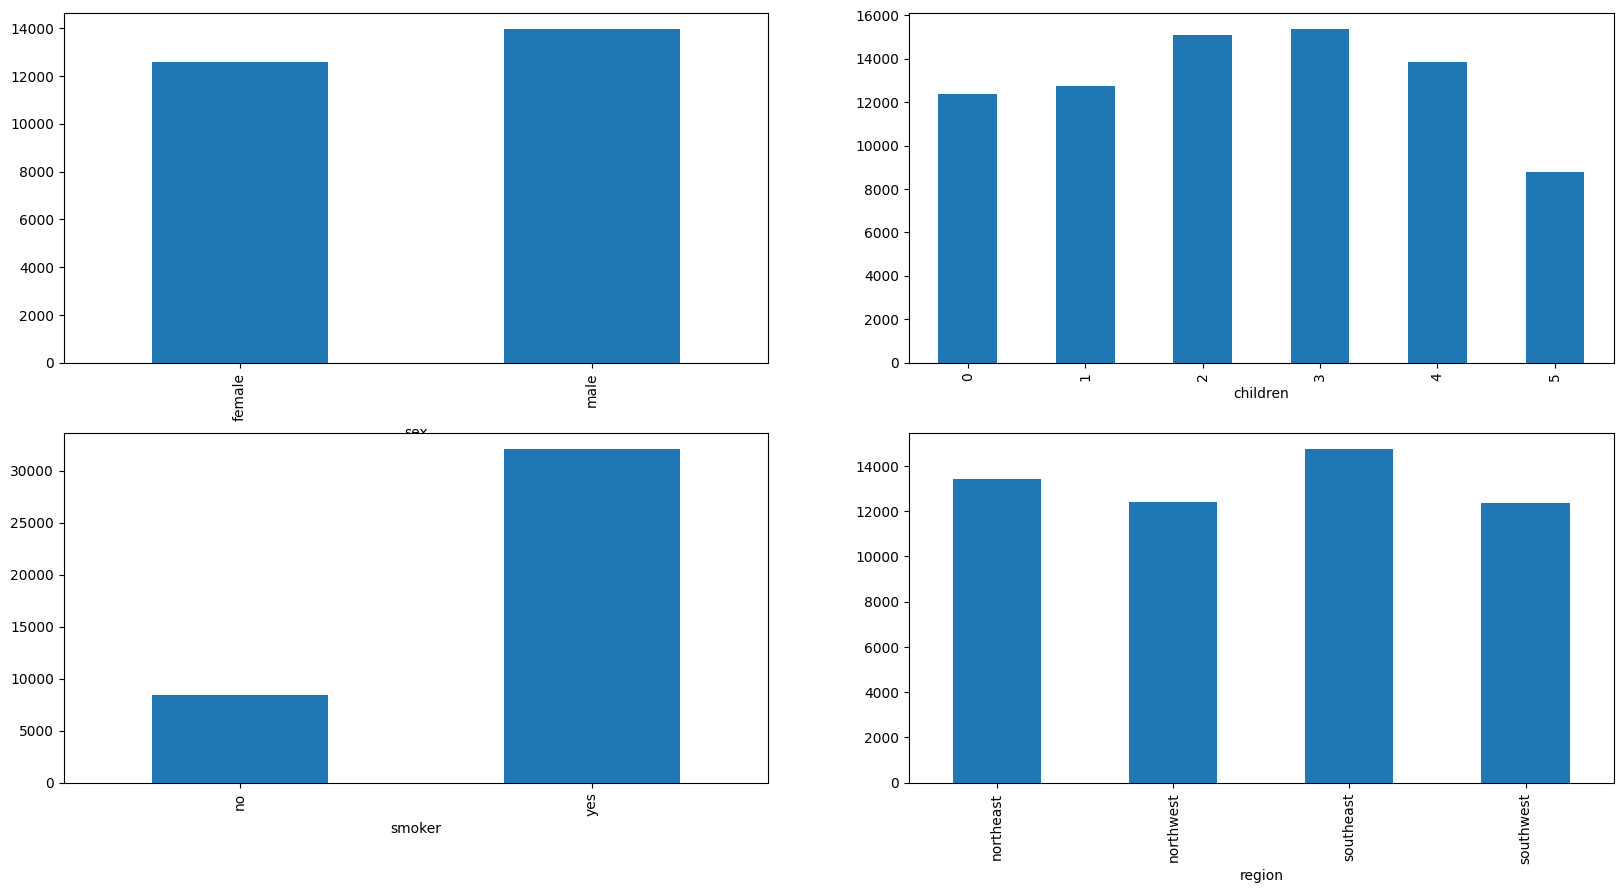

In [11]:
#bar graphs
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['charges'].plot.bar()
    df.
plt.show()

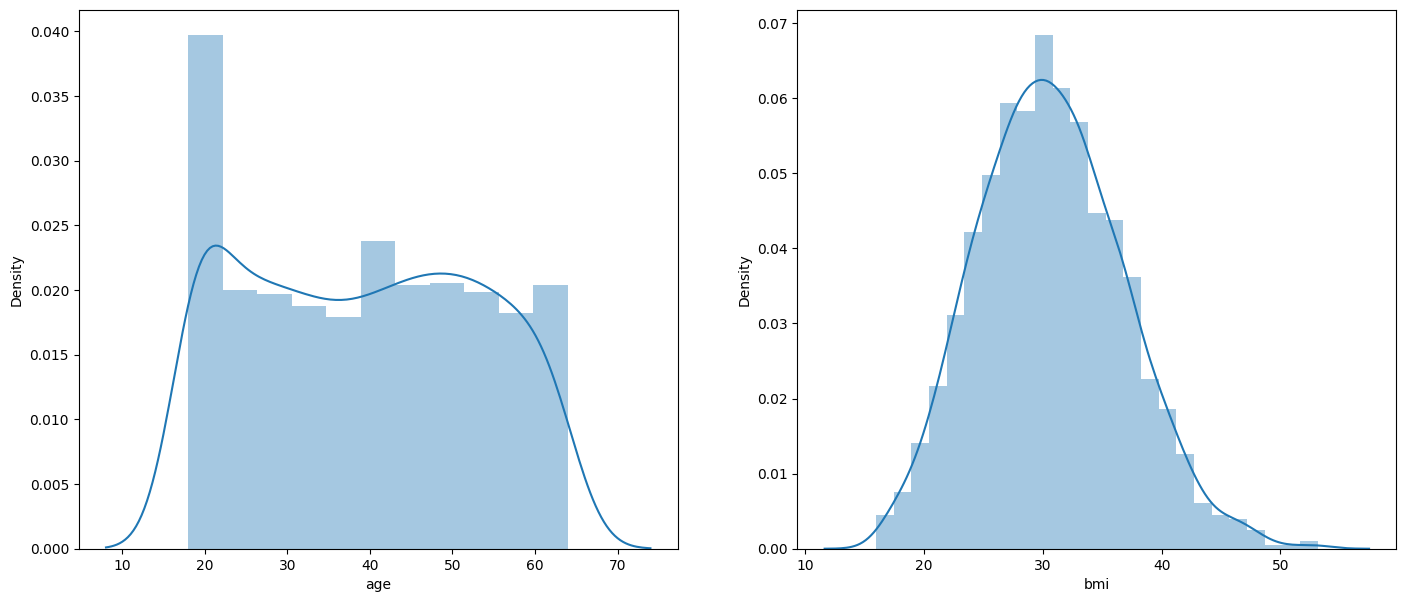

In [12]:
#plots
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sb.distplot(df[col])
plt.show()

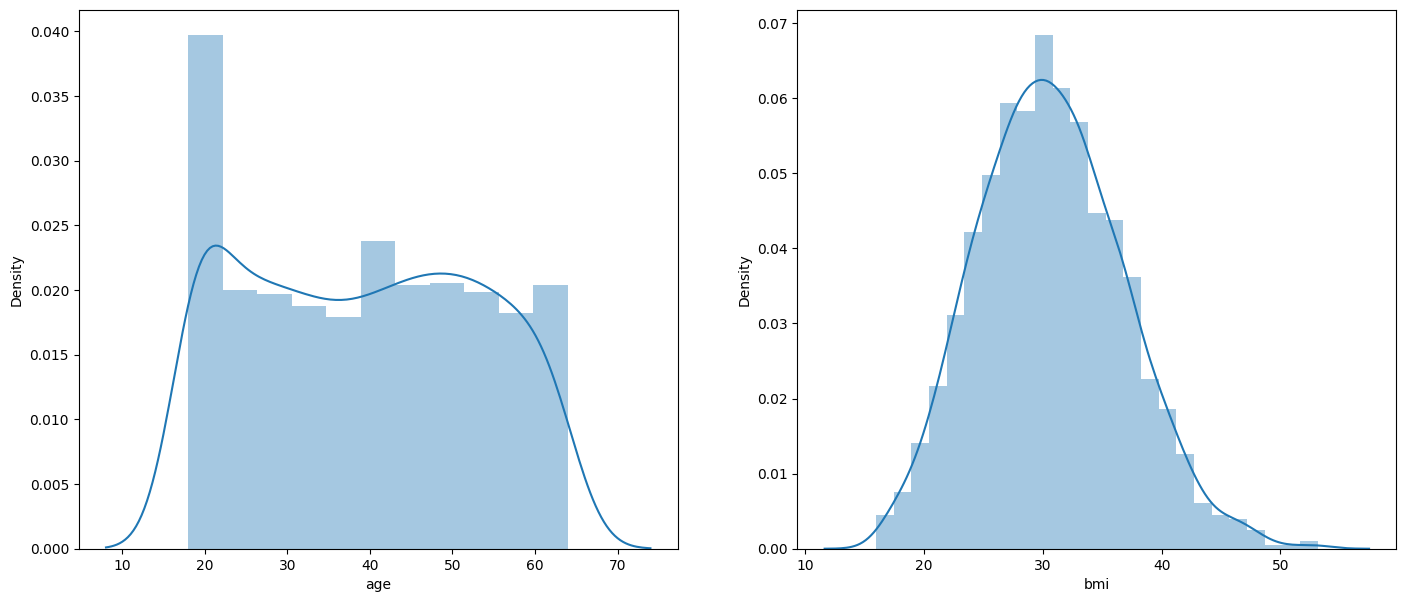

In [13]:
#plots
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sb.distplot(df[col])
plt.show()

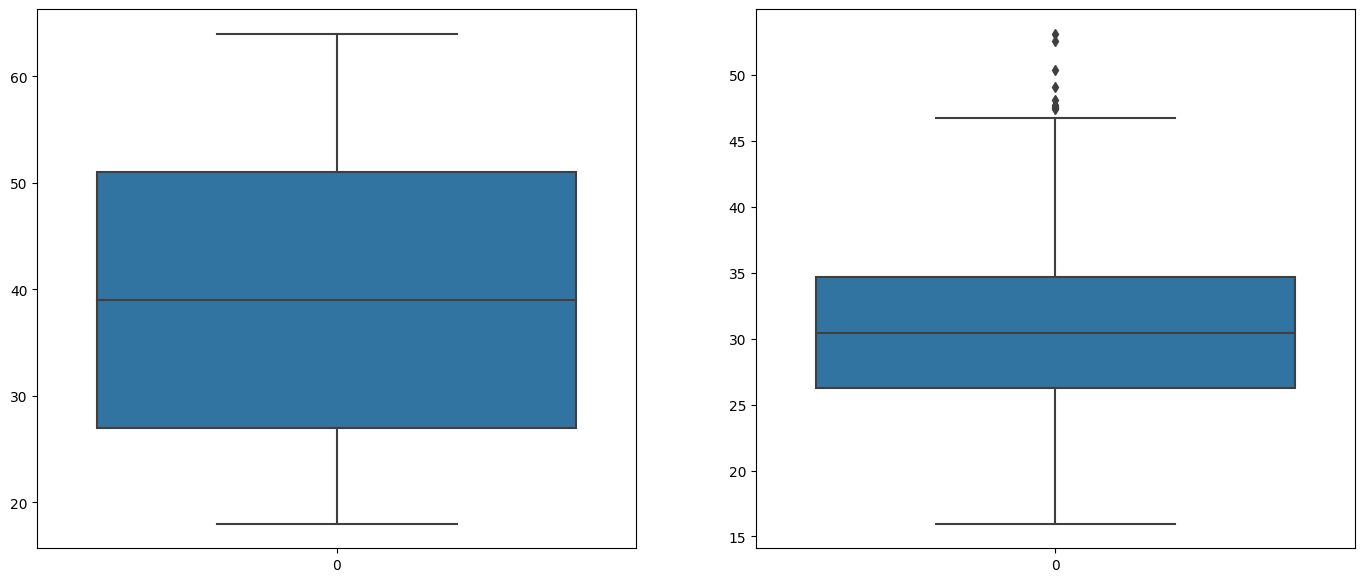

In [14]:
#check for outliers
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sb.boxplot(df[col])
plt.show()

In [21]:
#adjust the outliers
df.shape, df[df['bmi']<45].shape
df = df[df['bmi']<50]
for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])


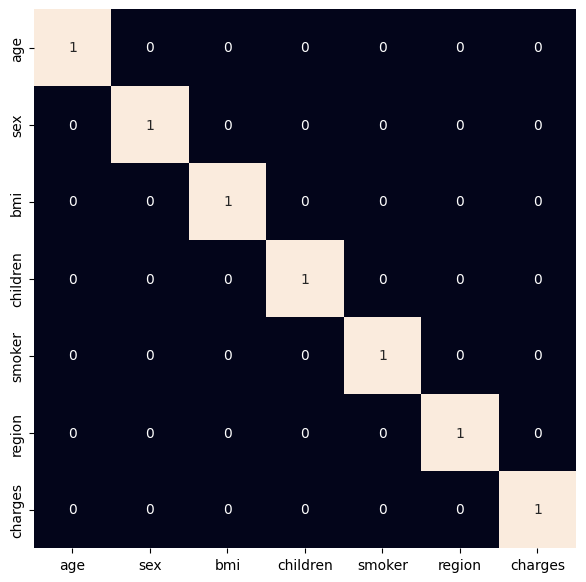

In [16]:
#use heatmap to see highly correlated variables
plt.figure(figsize=(7, 7))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [17]:
#split the dataset into train and test sets
features = df.drop(['charges'], axis=1)
target = df['charges']

In [18]:
X_train, X_val,\
    Y_train, Y_val = train_test_split(features, target, test_size=0.1, random_state=22)

X_train.shape, X_val.shape

((1201, 6), (134, 6))

In [19]:
#fit the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

#find the performance of various models
models = [LinearRegression(), XGBRegressor(),
          RandomForestRegressor(), AdaBoostRegressor(),
          Lasso(), Ridge()]

for i in range(6):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    pred_train = models[i].predict(X_train)
    print('Training Error : ', mape(Y_train, pred_train))

    pred_val = models[i].predict(X_val)
    print('Validation Error : ', mape(Y_val, pred_val))
    print()

LinearRegression() : 
Training Error :  0.4216031297330002
Validation Error :  0.3681964377536838

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) : 
Training Error :  0.07414118093426757
Validation Error :  0.43487251393507226

RandomForestRegressor() : 
Training Error :  0.12235405613584882
Validation Er

The best value reaches by XGBRegressor